# Experimentation and Uplift Testing 🕵️


### PLAN: Outline of this project





1. **GOAL**: Examine the performance in Trial vs Control stores.

2. **STRATEGY**: Recommendaion on the store layout 

### ANALYZE: Statistical hypothesis test


1. Define metrics to select control stores.
2. Analyze trial stores against controls, i.e A/B testing.
3. Data analysis and visualization and summarise findings and provide recommendations.

### 1.1 Load Data and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, t
import seaborn as sns

In [2]:
data = pd.read_csv("QVI_data.csv")

In [3]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['YM'] = data.DATE.dt.to_period('M')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YM
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [6]:
set(data.BRAND)

{'BURGER',
 'CCS',
 'CHEETOS',
 'CHEEZELS',
 'COBS',
 'DORITOS',
 'FRENCH',
 'GRNWVES',
 'INFUZIONS',
 'KETTLE',
 'NATURAL',
 'OLD',
 'PRINGLES',
 'RRD',
 'SMITHS',
 'SUNBITES',
 'THINS',
 'TOSTITOS',
 'TWISTIES',
 'TYRRELLS',
 'WOOLWORTHS'}

In [7]:
data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [8]:
data[data.duplicated(keep='last')]


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YM
106247,107024,2018-10-01,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium,2018-10


In [9]:
df= data.drop_duplicates()


In [10]:
df[df.duplicated(keep='last')].shape


(0, 13)

### 1.2 Define Metrics

In [11]:
#For each store and month calculate total sales, number of customers, 
# transactions per customer, chips per customer and the average price per unit.
data = df.copy()
def monthly_measure_metric():
    measureOverTime = data.groupby(["STORE_NBR", "YM"]).agg(
        totSales = ("TOT_SALES", np.sum),
        nCustomers = ("LYLTY_CARD_NBR", lambda x: x.nunique()),
        nTxn = ("TXN_ID", lambda x: x.nunique()),
        totProd = ("PROD_QTY", np.sum)
    )

    measureOverTime = measureOverTime.assign(nTxnPerCust = measureOverTime['nTxn'] / measureOverTime['nCustomers'],
                        nChipsPerTxn = measureOverTime['totProd']/measureOverTime['nTxn'],
                         avgPricePerUnit = measureOverTime['totSales']/measureOverTime['totProd'] ).drop(columns = ["nTxn", "totProd"])


    measureOverTime = measureOverTime.reset_index().sort_values(by = ['STORE_NBR','YM'])
    return measureOverTime



In [12]:

qvi_metric = monthly_measure_metric()
qvi_metric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   STORE_NBR        3169 non-null   int64    
 1   YM               3169 non-null   period[M]
 2   totSales         3169 non-null   float64  
 3   nCustomers       3169 non-null   int64    
 4   nTxnPerCust      3169 non-null   float64  
 5   nChipsPerTxn     3169 non-null   float64  
 6   avgPricePerUnit  3169 non-null   float64  
dtypes: float64(4), int64(2), period[M](1)
memory usage: 198.1 KB


In [13]:
### Filter to the pre‐trial period and stores with full observation periods 
result1 = qvi_metric['STORE_NBR'].value_counts()
print(set(result1))
### choose the store that has 12 month records
storesWithFullObs = result1[result1==12].index.unique().tolist()
full_observ = qvi_metric[qvi_metric['STORE_NBR'].isin(storesWithFullObs)]
full_observ.head(10)

{1, 2, 3, 11, 12}


,STORE_NBR,YM,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,2018-07,206.9,49,1.061224,1.192308,3.337097
1,1,2018-08,176.1,42,1.023810,1.255814,3.261111
2,1,2018-09,278.8,59,1.050847,1.209677,3.717333
3,1,2018-10,188.1,44,1.022727,1.288889,3.243103
4,1,2018-11,192.6,46,1.021739,1.212766,3.378947
5,1,2018-12,189.6,42,1.119048,1.212766,3.326316
6,1,2019-01,154.8,35,1.028571,1.166667,3.685714
7,1,2019-02,225.4,52,1.057692,1.181818,3.467692
8,1,2019-03,192.9,45,1.088889,1.183673,3.325862
9,1,2019-04,192.9,42,1.023810,1.325581,3.384211


In [14]:
### filter to the pre-trial obser
preTrial_full_observ = full_observ.loc[(full_observ['YM']< '2019-03')]
preTrial_full_observ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 3164
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   STORE_NBR        2080 non-null   int64    
 1   YM               2080 non-null   period[M]
 2   totSales         2080 non-null   float64  
 3   nCustomers       2080 non-null   int64    
 4   nTxnPerCust      2080 non-null   float64  
 5   nChipsPerTxn     2080 non-null   float64  
 6   avgPricePerUnit  2080 non-null   float64  
dtypes: float64(4), int64(2), period[M](1)
memory usage: 130.0 KB


In [15]:
##all data with full observation periods
print(full_observ.shape)

##pretrial period with all store_NBR
print(preTrial_full_observ.shape)

(3120, 7)
(2080, 7)


In [16]:
def calculate_correlation(input_table, metric_col, store_comparison):
    
    calc_dist_table = pd.DataFrame(columns=["Control_store", "Trial_store", "Corr_measure"])
    

    control_store_nbr = input_table[~input_table['STORE_NBR'].isin([77, 86, 88])]['STORE_NBR'].unique()
    

    for i in control_store_nbr:

        control_store = input_table[input_table['STORE_NBR'] == i][metric_col].tolist()
        trial_store = input_table[input_table['STORE_NBR'] == store_comparison][metric_col].tolist()
        df_corr = pd.DataFrame({
            'control_val':control_store,
            'trial_val': trial_store
        })
        Corr_measure =  df_corr['control_val'].corr(df_corr['trial_val'])
        
        calculated_measure = pd.DataFrame({
            "Control_store": [i],
            "Trial_store": [store_comparison],
            "Corr_measure": [Corr_measure]
        })
        

        calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)
        
    
    return calc_dist_table

In [17]:
calculate_correlation(preTrial_full_observ, 'nCustomers', 77)


,Control_store,Trial_store,Corr_measure
0,1,77,0.350572
1,2,77,-0.455226
2,3,77,0.756913
3,4,77,-0.302046
4,5,77,0.277619
...,...,...,...
252,268,77,0.283287
253,269,77,-0.492708
254,270,77,-0.176932
255,271,77,-0.056788


In [18]:
#### Create a function to calculate a standardised magnitude distance for a measure,
#### looping through each control store

def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    calcDistTable = pd.DataFrame(columns = [ "Control_store", "Trial_store", "YearMonth", 'Measure'])
    control_store_nbr = inputTable[~inputTable['STORE_NBR'].isin([77, 86, 88])]['STORE_NBR'].unique()
    
    for i in control_store_nbr:
        
        control_store = inputTable[inputTable['STORE_NBR'] == i][[metricCol, 'YM']]
        trial_store = inputTable[inputTable['STORE_NBR'] == storeComparison][[metricCol, 'YM']]
        
        merged_data = pd.merge(control_store, trial_store, on='YM', suffixes=('_control', '_trial'))
       
        merged_data['Measure'] = abs(merged_data[metricCol + '_control'] - merged_data[metricCol + '_trial'])
        
        calculated_measure = pd.DataFrame({
            "Control_store": i,
            "Trial_store": storeComparison,
            "YearMonth": merged_data['YM'],
            "Measure": merged_data['Measure']
        })
        
        calcDistTable = pd.concat([calcDistTable, calculated_measure], ignore_index=True)
    
    min_max_dist = calcDistTable.groupby(['Trial_store', 'YearMonth']).agg(minDist=('Measure', 'min'), maxDist=('Measure', 'max')).reset_index()
        
    distTable = pd.merge(calcDistTable, min_max_dist, on = ['Trial_store', 'YearMonth'])

    distTable['magnitudeMeasure'] = 1 - (distTable['Measure'] - distTable['minDist']) / (distTable['maxDist'] - distTable['minDist'])
    finalDistTable = distTable.groupby(['Control_store', 'Trial_store'])['magnitudeMeasure'].mean().reset_index()
    #final_dist_table = dist_table.groupby(['Store1', 'Store2']).agg(mag_measure=('magnitudeMeasure', 'mean')).reset_index()
       
    return finalDistTable
        


In [19]:
calculateMagnitudeDistance(preTrial_full_observ, 'nCustomers', 77)

,Control_store,Trial_store,magnitudeMeasure
0,1,77,0.936978
1,2,77,0.909367
2,3,77,0.317365
3,4,77,0.219894
4,5,77,0.481234
...,...,...,...
252,268,77,0.933530
253,269,77,0.336097
254,270,77,0.362392
255,271,77,0.484754


In [20]:
def combine_corr_dist(inputTable, metricCol, storeComparison, corr_weight):
    
    corrs = calculate_correlation(input_table = inputTable, metric_col = metricCol, store_comparison = storeComparison)
    dists = calculateMagnitudeDistance(inputTable = inputTable, metricCol = metricCol, storeComparison = storeComparison)
    
    combine = pd.merge(corrs, dists, on =["Control_store", "Trial_store"])
    combine['scoreNCust'] = combine["Corr_measure"] * corr_weight + combine["magnitudeMeasure"] * (1-corr_weight)
    
    
    return combine

In [21]:

def get_final_result(trial_store):

    combined_results = pd.DataFrame()
    metrics = ['nCustomers', 'totSales']
    
    for metric in metrics:
        result = combine_corr_dist(preTrial_full_observ, metric, trial_store, 0.5)
        if combined_results.empty:
            combined_results = result
        else:
            combined_results = pd.merge(result, combined_results, on=['Control_store', 'Trial_store'])

    combined_results['finalControlScore'] = (
        combined_results['scoreNCust_x'] * 0.5 + combined_results['scoreNCust_y'] * 0.5
    )
    
    final_scores = combined_results.groupby(['Control_store', 'Trial_store'])['finalControlScore'].mean().reset_index()
    

    top_control_stores = final_scores.sort_values('finalControlScore', ascending=False)
    top_control_stores = top_control_stores.groupby('Trial_store').head(1).sort_values(['Trial_store', 'finalControlScore'], ascending=False)
    
    control_store = top_control_stores['Control_store'].values[0]
    
    return f"The control store is {control_store} for trial store {trial_store}"


In [22]:
for i in [77, 86, 88]:
    print(get_final_result(i))

The control store is 233 for trial store 77
The control store is 155 for trial store 86
The control store is 237 for trial store 88


Now that we have found a control store：

Trial store 77: Control Store 233

Trial store 86: Control Store 155

Trial store 88: Control Store 237

### 2. Analyze Trial Stores Against Controls.

In [23]:
control_store = [233,155,237]
trial_store = [88, 86, 77]

comparison_date = pd.Period('2019-02', freq='M')
preTrial_full_observ["Store_type"] = 'Other'  # Default value for all rows
    
for index, row in preTrial_full_observ.iterrows():
    if row['STORE_NBR'] in trial_store: 
        preTrial_full_observ.loc[index, "Store_type"] = 'Trail'
        
    elif row['STORE_NBR'] in control_store:
        preTrial_full_observ.loc[index, "Store_type"] = 'Control'

preTrial_full_observ

/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_15559/332612289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preTrial_full_observ["Store_type"] = 'Other'  # Default value for all rows


,STORE_NBR,YM,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type
0,1,2018-07,206.9,49,1.061224,1.192308,3.337097,Other
1,1,2018-08,176.1,42,1.023810,1.255814,3.261111,Other
2,1,2018-09,278.8,59,1.050847,1.209677,3.717333,Other
3,1,2018-10,188.1,44,1.022727,1.288889,3.243103,Other
4,1,2018-11,192.6,46,1.021739,1.212766,3.378947,Other
...,...,...,...,...,...,...,...,...
3160,272,2018-10,430.6,44,1.136364,1.980000,4.349495,Other
3161,272,2018-11,376.2,41,1.097561,1.933333,4.324138,Other
3162,272,2018-12,403.9,47,1.000000,1.893617,4.538202,Other
3163,272,2019-01,423.0,46,1.086957,1.920000,4.406250,Other


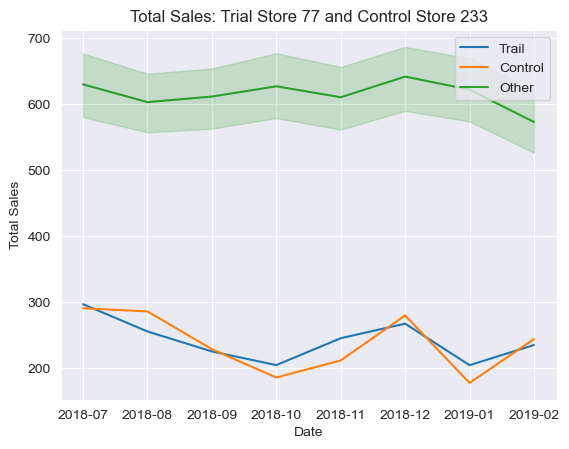

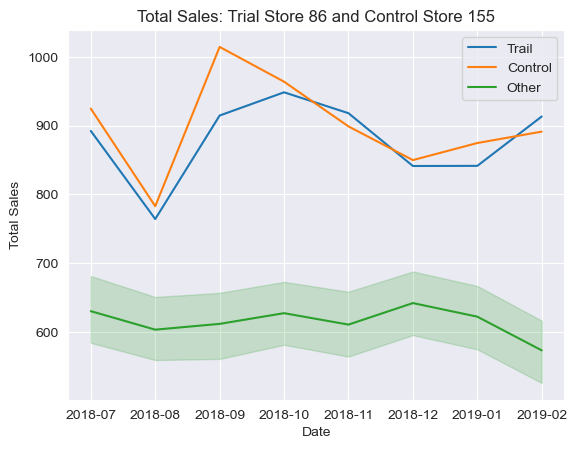

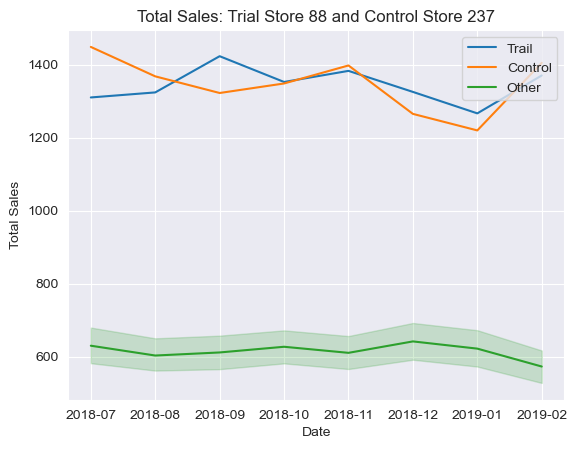

In [25]:
Pretrail_sales = pd.DataFrame(preTrial_full_observ.groupby(['YM','STORE_NBR','Store_type'])['totSales'].mean()).reset_index()
trial_control_dict = {77:233, 86:155, 88:237}
d_other = Pretrail_sales[Pretrail_sales['Store_type'] == 'Other']

for key, value in trial_control_dict.items(): 
    d_triCon = Pretrail_sales[Pretrail_sales['STORE_NBR'].isin([key, value])]
    pre_plt = pd.concat([d_triCon, d_other])


    plt.figure()  
    sns.lineplot(
            data = pre_plt,
            x=pre_plt["YM"].astype(str),
            y=pre_plt["totSales"],
            hue=pre_plt["Store_type"]
        )
    plt.title(f"Total Sales: Trial Store {key} and Control Store {value}")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.legend(loc='upper right')  

    plt.show()

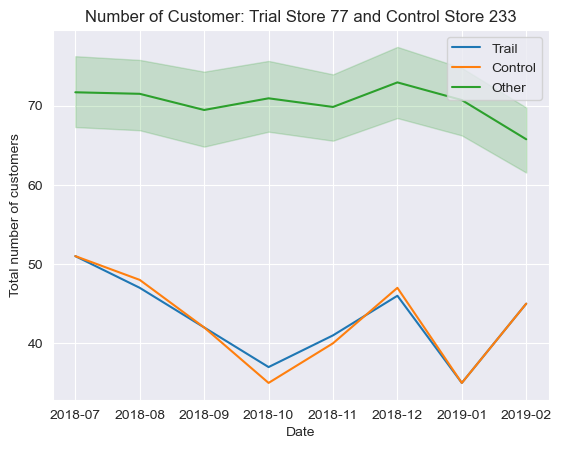

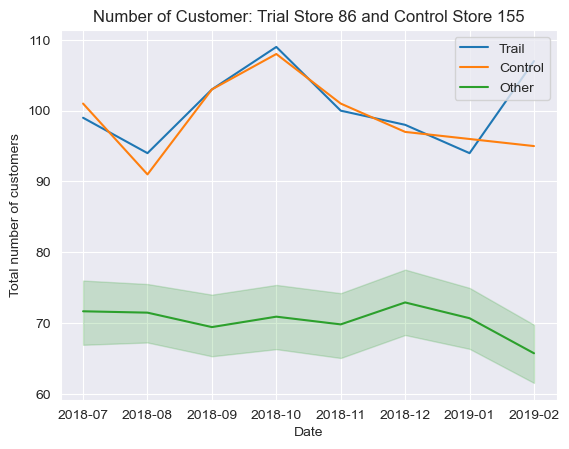

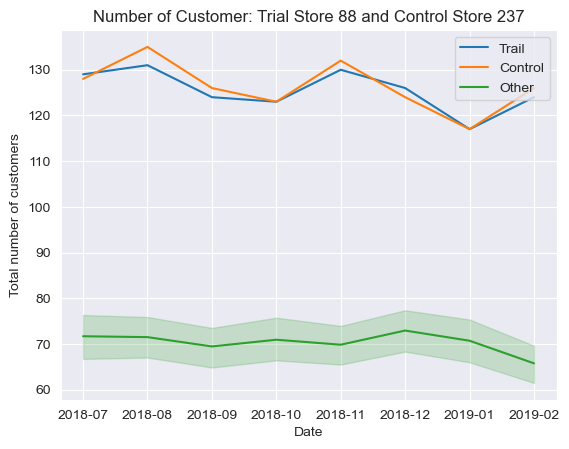

In [26]:
Pretrail_nCustomer = pd.DataFrame(preTrial_full_observ.groupby(['YM','STORE_NBR','Store_type'])['nCustomers'].mean()).reset_index()

trial_control_dict = {77:233, 86:155, 88:237}
d_other = Pretrail_nCustomer[Pretrail_nCustomer['Store_type'] == 'Other']

for key, value in trial_control_dict.items(): 
    d_triCon = Pretrail_nCustomer[Pretrail_nCustomer['STORE_NBR'].isin([key, value])]
    pre_plt = pd.concat([d_triCon, d_other])
    plt.figure()  # Create a new figure for each plot
    sns.lineplot(
        x=pre_plt["YM"].astype(str),
        y=pre_plt["nCustomers"],
        hue=pre_plt["Store_type"]
    )
    plt.title(f"Number of Customer: Trial Store {key} and Control Store {value}")
    plt.xlabel("Date")
    plt.ylabel("Total number of customers")
    plt.legend(loc='upper right')  # Adjust the legend location as needed
    
plt.show()



Total number of total sales and customers of the control and trial stores are similar.

### Assess the impact of the trial

In [55]:
def get_test(trial_num, column):
    # Suppress SettingWithCopyWarning
    pd.options.mode.chained_assignment = None
    
    # Trial and control store dictionary
    trial_control_dict = {88: 237, 86: 155, 77: 233}
    
    # Calculate ratio control
    trial_data = preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_num) & (preTrial_full_observ['YM'] < '2019-02')]
    control_data = preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_control_dict[trial_num]) & (preTrial_full_observ['YM'] < '2019-02')]
    ratio_control = trial_data[column].sum() / control_data[column].sum()
    
    # Get monthly measure metric and scale control store 
    measure_over_time = monthly_measure_metric()
    Control_Store_Scale = measure_over_time[measure_over_time['STORE_NBR'] == trial_control_dict[trial_num]].copy()
    Control_Store_Scale['Scale_Control_Value'] = Control_Store_Scale[column] * ratio_control
    
    # Calculate percentage differences
    temp1 = Control_Store_Scale[['YM', 'STORE_NBR', 'Scale_Control_Value']]
    temp2 = measure_over_time[measure_over_time['STORE_NBR'] == trial_num][['YM', 'STORE_NBR', column]]
    percentage_diff = temp1.merge(temp2, how='left', on='YM', suffixes=('_control', '_trial'))
    
    #t-testing
    control_value = percentage_diff['Scale_Control_Value']
    trial_value = percentage_diff[column]
    t_result = stats.ttest_ind(a=control_value, b=trial_value, equal_var=False)
    
    #show monthly testing result
    percentage_diff['percentage_diff'] = abs(percentage_diff[column] - percentage_diff['Scale_Control_Value']) / percentage_diff['Scale_Control_Value']
    
    # Calculate standard deviation
    std_dev = percentage_diff[percentage_diff.YM < '2019-02']['percentage_diff'].std(ddof=0)
    
    # Calculate t-values for the post-trial period
    result = percentage_diff[(percentage_diff.YM > '2019-01') & (percentage_diff.YM < '2019-05')].copy()
    result['t_value'] = (result['percentage_diff'] - 0) / std_dev
    
    # Critical t-value
    alpha = 0.05
    critical_t_value = t.ppf(1 - alpha, df=len(result) - 1)
    print("T-test Result:", t_result)
    print("\nT-values DataFrame:\n", result[['YM', 't_value']])
    print("\nCritical T-value:", critical_t_value)
    #return t_result, result[['YM', 't_value']], critical_t_value
    

In [28]:
def get_line_chart(trial_store_num, column):
    measure_over_time = qvi_metric.copy()
    
    trial_control_dict = {88: 237, 86: 155, 77: 233}
    
    ratio_control = (preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_store_num) & 
                                          (preTrial_full_observ['YM'] < '2019-02')][column].sum()) / \
                    (preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_control_dict[trial_store_num]) & 
                                          (preTrial_full_observ['YM'] < '2019-02')][column].sum())
    
    measure_over_time_sales = monthly_measure_metric()
    Control_Store_Sales_Scale = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == trial_control_dict[trial_store_num]].copy()
    Control_Store_Sales_Scale['Scale_Control_Value'] = Control_Store_Sales_Scale[column] * ratio_control
    
    percentage_diff = pd.DataFrame()
    
    temp1 = Control_Store_Sales_Scale[['YM', 'STORE_NBR', 'Scale_Control_Value']]
    temp2 = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == trial_store_num][['YM', 'STORE_NBR', column]]
    
    aa = temp1.merge(temp2, how='left', on='YM', suffixes=('_control', '_trial'))
    
    percentage_diff = pd.concat([percentage_diff, aa])
    percentage_diff['percentage_diff'] = abs(percentage_diff[column] - percentage_diff['Scale_Control_Value']) / percentage_diff['Scale_Control_Value']
    
    std_dev = percentage_diff[percentage_diff.YM < '2019-02']['percentage_diff'].std(ddof=0)
    print(std_dev)
    
    
    measure_over_time['store_type'] = measure_over_time['STORE_NBR'].apply(
        lambda x: 'trial' if x in trial_control_dict.keys() else ('control' if x in trial_control_dict.values() else 'others')
    )
    
    test = measure_over_time[(measure_over_time.STORE_NBR == trial_store_num) | 
                             (measure_over_time.STORE_NBR == trial_control_dict[trial_store_num])]
    
    test = test.groupby(['YM', 'store_type']).agg({column: 'mean'}).reset_index()
    test['YM'] = pd.to_datetime(test['YM'].dt.year.astype(str) + '-' + test['YM'].dt.month.astype(str) + '-01')
    
    test_95 = test[test.store_type == 'control'].copy()
    test_95[column] *= (1 + std_dev * 2)
    test_95['store_type'] = 'Control 95th % confidence interval'
    
    test_5 = test[test.store_type == 'control'].copy()
    test_5[column] *= (1 - std_dev * 2)
    test_5['store_type'] = 'Control 5th % confidence interval'
    
    assessment = pd.concat([test, test_95, test_5]).sort_values(by=['YM', 'store_type']).reset_index(drop=True)
    
    column_display_name = {'totSales': 'Total Number of Sales', 'nCustomers': 'Total Number of Customers'}.get(column, column)
    
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.lineplot(
        x=assessment["YM"].astype(str),
        y=assessment[column],
        hue=assessment["store_type"]
    )
    
    plt.title(f"Monthly {column_display_name} for Trial Store {trial_store_num}", fontsize=16, color='black')
    plt.xlabel("Date")
    plt.ylabel(column_display_name, fontsize=12, color='black')
    
    start_date = '2019-02-01'
    end_date = '2019-04-01'
    plt.axvspan(start_date, end_date, color='gray', alpha=0.5)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 6})
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, assessment[column].max())
    plt.tight_layout()
    plt.show()

#### Trial Store 77

In [56]:
get_test(77,'totSales')

T-test Result: Ttest_indResult(statistic=-0.6530505751779069, pvalue=0.5223023147946262)

T-values DataFrame:
         YM    t_value
7  2019-02   1.278363
8  2019-03   7.927151
9  2019-04  13.476023

Critical T-value: 2.919985580355516


In [ ]:
get_line_chart(77, 'totSales')

In [ ]:
get_test(77,'nCustomers')

In [ ]:
get_line_chart(77, 'nCustomers')

The results show that the trial in store 77 is significantly different to its control store in the trial period as
the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the
three trial months.

#### Trial Store: 88

In [ ]:
get_test(88, 'totSales')

In [ ]:
get_line_chart(88, 'totSales')

In [ ]:
get_test(88, 'nCustomers')

In [ ]:
get_line_chart(88, 'nCustomers')

#### Trial Store 86

In [ ]:
get_test(86, 'totSales')

In [ ]:
get_line_chart(86, 'totSales')

In [ ]:
get_test(86, 'nCustomers')

In [ ]:
get_line_chart(86, 'nCustomers')

Conclusion 

We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.

The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the
three trial months but this is not the case for trial store 86. We can check with the client if the implementation
of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. 

In [38]:
def get_test(trial_num, column):
    # Suppress SettingWithCopyWarning
    pd.options.mode.chained_assignment = None
    
    # Trial and control store dictionary
    trial_control_dict = {88: 237, 86: 155, 77: 233}
    
    # Calculate ratio control
    trial_data = preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_num) & (preTrial_full_observ['YM'] < '2019-02')]
    control_data = preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_control_dict[trial_num]) & (preTrial_full_observ['YM'] < '2019-02')]
    ratio_control = trial_data[column].sum() / control_data[column].sum()
    
    # Get monthly measure metric and scale control store 
    measure_over_time = monthly_measure_metric()
    Control_Store_Scale = measure_over_time[measure_over_time['STORE_NBR'] == trial_control_dict[trial_num]].copy()
    Control_Store_Scale['Scale_Control_Value'] = Control_Store_Scale[column] * ratio_control
    
    # Calculate percentage differences
    temp1 = Control_Store_Scale[['YM', 'STORE_NBR', 'Scale_Control_Value']]
    temp2 = measure_over_time[measure_over_time['STORE_NBR'] == trial_num][['YM', 'STORE_NBR', column]]
    percentage_diff = temp1.merge(temp2, how='left', on='YM', suffixes=('_control', '_trial'))
    
    #t-testing
    control_value = percentage_diff['Scale_Control_Value']
    trial_value = percentage_diff[column]
    t_result = stats.ttest_ind(a=control_value, b=trial_value, equal_var=False)


    percentage_diff['percentage_diff'] = abs(percentage_diff[column] - percentage_diff['Scale_Control_Value']) / percentage_diff['Scale_Control_Value']
    
    # Calculate standard deviation
    std_dev = percentage_diff[percentage_diff.YM < '2019-02']['percentage_diff'].std(ddof=0)
    
    # Calculate t-values for the post-trial period
    result = percentage_diff[(percentage_diff.YM > '2019-01') & (percentage_diff.YM < '2019-05')].copy()
    result['t_value'] = (result['percentage_diff'] - 0) / std_dev
    
    # Critical t-value
    alpha = 0.05
    critical_t_value = t.ppf(1 - alpha, df=len(result) - 1)
    
    return t_result, result[['YM', 't_value']], critical_t_value

In [31]:
trial_control_dict = {88: 237, 86: 155, 77: 233}

trial_data = preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == 77) & (preTrial_full_observ['YM'] < '2019-02')]
control_data = preTrial_full_observ[(preTrial_full_observ['STORE_NBR'] == trial_control_dict[77]) & (preTrial_full_observ['YM'] < '2019-02')]
ratio_control = trial_data['totSales'].sum() / control_data['totSales'].sum()
    
    
measure_over_time = monthly_measure_metric()
Control_Store_Scale = measure_over_time[measure_over_time['STORE_NBR'] == trial_control_dict[77]].copy()
Control_Store_Scale['Scale_Control_Value'] = Control_Store_Scale['totSales'] * ratio_control

measure_over_time = monthly_measure_metric()
Control_Store_Scale = measure_over_time[measure_over_time['STORE_NBR'] == trial_control_dict[77]].copy()
Control_Store_Scale['Scale_Control_Value'] = Control_Store_Scale['totSales'] * ratio_control

temp1 = Control_Store_Scale[['YM', 'STORE_NBR', 'Scale_Control_Value']]
temp2 = measure_over_time[measure_over_time['STORE_NBR'] == 77][['YM', 'STORE_NBR', 'totSales']]
percentage_diff = temp1.merge(temp2, how='left', on='YM', suffixes=('_control', '_trial'))
percentage_diff.head()

,YM,STORE_NBR_control,Scale_Control_Value,STORE_NBR_trial,totSales
0,2018-07,233,297.565550,77,296.8
1,2018-08,233,292.652187,77,255.5
2,2018-09,233,233.998916,77,225.2
3,2018-10,233,190.085733,77,204.5
4,2018-11,233,216.597421,77,245.3


In [36]:
from scipy import stats
control_value = percentage_diff['Scale_Control_Value']
trial_value = percentage_diff['totSales']
stats.ttest_ind(a=control_value, b=trial_value, equal_var=False)

Ttest_indResult(statistic=-0.6530505751779069, pvalue=0.5223023147946262)